<a href="https://colab.research.google.com/github/BiniCodes/caffeine_coders_emotion_detection/blob/master/Testing_Dataset_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning of the Testing Dataset

In [0]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.4.1-cp36-cp36m-linux_x86_64.whlimport torch
import torch.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

  

  ERROR: HTTP error 403 while getting http://download.pytorch.org/whl/cu80/torch-0.4.1-cp36-cp36m-linux_x86_64.whlimport
  ERROR: Could not install requirement http://download.pytorch.org/whl/cu80/torch-0.4.1-cp36-cp36m-linux_x86_64.whlimport because of error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu80/torch-0.4.1-cp36-cp36m-linux_x86_64.whlimport
ERROR: Could not install requirement http://download.pytorch.org/whl/cu80/torch-0.4.1-cp36-cp36m-linux_x86_64.whlimport because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu80/torch-0.4.1-cp36-cp36m-linux_x86_64.whlimport for URL http://download.pytorch.org/whl/cu80/torch-0.4.1-cp36-cp36m-linux_x86_64.whlimport


In [0]:
import torch
import torch.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence


In [0]:
import re
import numpy as np
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
 #!ls "/content/gdrive/My Drive/"

In [0]:

!cp '/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/TestingData/fear_TestingData.csv' 'fearTe.csv'
!cp '/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/TestingData/anger_TestingData.csv' 'angerTe.csv'
!cp '/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/TestingData/sadness_TestingData.csv' 'sadnessTe.csv'
!cp '/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/TestingData/joy_TestingData.csv' 'joyTe.csv'

In [0]:
f = open('fearTe.csv', 'r')
fearTe = f.read()
print(fearTe)

﻿id,tweet,emotion,intensity
21257,#Matthew 25; 1-13\nCould somebody shoot a #video about it?\nIt could be 1 of those #horror videos but in the same time turning many 2 #Christ,fear,0.417
21258,@bkero @whispersystems Which really sucks because typing on a mobile device is always horrible and I hate it.,fear,0.438
21259,Be #afraid of the #quiet ones they are the ones who actually #think.,fear,0.542
21260,@riinkanei he's a horrible person and now i gag when i see people quote him,fear,0.583
21261,What we fear doing most is usually what we most need to do.' ~Tim Ferriss #inspiring #inspired #motivation #fear #success #hustle,fear,0.292
21262,What we fear doing most is usually what we most need to do.' ~Tim Ferriss #inspiring #inspired #motivation  #success #hustle,fear,0.188
21263,a pedicure is supposed to be nice but honestly I'm so nervous rn my feet are too ticklish,fear,0.604
21264,US you need to band together not apart #nevertrump he promotes hatred and fuels #fear,fear,0.729
21265,US

In [0]:
a = open('angerTe.csv', 'r')
angerTe = a.read()
print(angerTe)

﻿id,tweet,emotion,intensity
10941,"At the point today where if someone says something remotely kind to me, a waterfall will burst out of my eyes",anger,0.319
10942,@CorningFootball  IT'S GAME DAY!!!!      T MINUS 14:30  #relentless,anger,0.144
10943,This game has pissed me off more than any other game this year. My blood is boiling! Time to turn it off! #STLCards,anger,0.898
10944,@spamvicious I've just found out it's Candice and not Candace. She can pout all she likes for me ðŸ˜,anger,0.271
10945,@moocowward @mrsajhargreaves @Melly77 @GaryBarlow if he can't come to my Mum'a 60th after 25k tweets then why should I ðŸ™ˆ  #soreloser,anger,0.646
10946,@moocowward @mrsajhargreaves @Melly77 @GaryBarlow if he can't come to my Mum'a 60th after 25k tweets then why should I ðŸ™ˆ #bitter #soreloser,anger,0.583
10947,wanna go home and focus up on this game . Don't wanna rage at all,anger,0.375
10948,@virginmedia I've been disconnected whilst on holiday ðŸ˜¤ but I don't move house until the 1st O

In [0]:
s = open('sadnessTe.csv', 'r')
sadnessTe = s.read()
print(sadnessTe)

﻿id,tweet,emotion,intensity
40860,My 2 teens sons just left in the car to get haircuts. I'm praying up a storm that they make it home safely!! #sad #TerenceCrutcher,sadness,0.667
40861,My 2 teens sons just left in the car to get haircuts. I'm praying up a storm that they make it home safely!!  #TerenceCrutcher,sadness,0.458
40862,HartRamsey'sUPLIFT If you're still discouraged it means you're listening to the wrong voices &amp; looking to the wrong source.Look to the LORD!,sadness,0.396
40863,@AmontanaW I nearly dropped my phone into the sink HAHAHAHA,sadness,0.271
40864,Whenever I'm feeling sad I will listen to monsta x and hug my teddy bear and I always feel better,sadness,0.604
40865,@spamvicious I've just found out it's Candice and not Candace. She can pout all she likes for me ðŸ˜,sadness,0.271
40866,"@British_Airways In your Concorde Lounge in Terminal 7 JFK. So saddened to have to say, service so far is dismal. Don't expect a reply.",sadness,0.542
40867,"#Facebook is #depressing

In [0]:
j = open('joyTe.csv', 'r')
joyTe = j.read()
print(joyTe)

﻿id,tweet,emotion,intensity
30902,"You must be knowing #blithe means (adj.)  Happy, cheerful.",joy,0.583
30903,Old saying 'A #smile shared is one gained for another day' @YEGlifer @Scott_McKeen,joy,0.5
30904,Bridget Jones' Baby was bloody hilarious ðŸ˜… #BridgetJonesBaby,joy,0.86
30905,@Elaminova sparkling water makes your life sparkly,joy,0.521
30906,I'm tired of everybody telling me to chill out and everythings ok. no the fuck its not. I'm tired of faking a a fucking smile,joy,0.042
30907,#GBBO can cheer me up â˜ºï¸,joy,0.417
30908,"&amp; as much as I hate for a dude to cheat, women forego pleasing their man, they get lazy &amp; men get lazy &amp; then it's just pointless",joy,0.16
30909,@GOT7Official @jrjyp happy birthday jin young!!!!!! #PrinceJinyoungDay #happyjinyoungday #got7  #birthday,joy,0.75
30910,@GOT7Official @jrjyp happy birthday jin young!!!!!! #PrinceJinyoungDay  #happyjinyoungday #got7 #happy #birthday,joy,0.688
30911,The race advances only by the extra achievements o

In [0]:
import os
import glob
import pandas as pd

os.chdir("/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/TestingData/")

In [0]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [0]:
#combine all training data files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "TestingData1.csv", index=False, encoding='utf-8-sig')

In [0]:
ted = open('TestingData1.csv', 'r')
testing = ted.read()
print(testing)

﻿id,tweet,emotion,intensity
10941,"At the point today where if someone says something remotely kind to me, a waterfall will burst out of my eyes",anger,0.319
10942,@CorningFootball  IT'S GAME DAY!!!!      T MINUS 14:30  #relentless,anger,0.14400000000000002
10943,This game has pissed me off more than any other game this year. My blood is boiling! Time to turn it off! #STLCards,anger,0.898
10944,@spamvicious I've just found out it's Candice and not Candace. She can pout all she likes for me ðŸ˜,anger,0.271
10945,@moocowward @mrsajhargreaves @Melly77 @GaryBarlow if he can't come to my Mum'a 60th after 25k tweets then why should I ðŸ™ˆ  #soreloser,anger,0.6459999999999999
10946,@moocowward @mrsajhargreaves @Melly77 @GaryBarlow if he can't come to my Mum'a 60th after 25k tweets then why should I ðŸ™ˆ #bitter #soreloser,anger,0.583
10947,wanna go home and focus up on this game . Don't wanna rage at all,anger,0.375
10948,@virginmedia I've been disconnected whilst on holiday ðŸ˜¤ but I don't

In [0]:
testingDa = pd.read_csv('TestingData1.csv')
testingDa

,id,tweet,emotion,intensity
0,10941,At the point today where if someone says somet...,anger,0.319
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,10943,This game has pissed me off more than any othe...,anger,0.898
3,10944,@spamvicious I've just found out it's Candice ...,anger,0.271
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646
5,10946,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.583
6,10947,wanna go home and focus up on this game . Don'...,anger,0.375
7,10948,@virginmedia I've been disconnected whilst on ...,anger,0.625
8,10949,@virginmedia I've been disconnected whilst on ...,anger,0.396
9,10950,I wanna see you smile I don't wanna see you ma...,anger,0.250


testingDa.emotion.value_counts().plot.bar()

In [0]:
testingDa.shape

(9426, 4)

In [0]:
testingDa.to_pickle("./testingData1.pkl")

In [0]:
dataTe = pd.read_pickle("./testingData1.pkl")
dataTe.head(10)

,id,tweet,emotion,intensity
0,10941,At the point today where if someone says somet...,anger,0.319
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,10943,This game has pissed me off more than any othe...,anger,0.898
3,10944,@spamvicious I've just found out it's Candice ...,anger,0.271
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646
5,10946,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.583
6,10947,wanna go home and focus up on this game . Don'...,anger,0.375
7,10948,@virginmedia I've been disconnected whilst on ...,anger,0.625
8,10949,@virginmedia I've been disconnected whilst on ...,anger,0.396
9,10950,I wanna see you smile I don't wanna see you ma...,anger,0.250


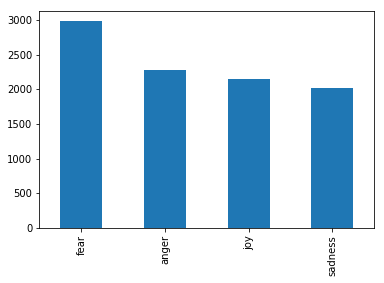

In [0]:
dataTe.emotion.value_counts().plot.bar()

In [0]:
dataTe.shape

(9426, 4)

In [0]:
### Helper functions
import pickle

def convert_to_pickle(item, directory):
    pickle.dump(item, open(directory,"wb"))


def load_from_pickle(directory):
    return pickle.load(open(directory,"rb"))

In [0]:
testingData = load_from_pickle("/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/TestingData/testingData1.pkl")

In [0]:
testingData.shape

(9426, 4)

In [0]:
print(type(testingData))

<class 'pandas.core.frame.DataFrame'>


In [0]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
import re

#Clean the @mention from tweets
pat1 = r'@[A-Za-z0-9]+'

#Clean links from tweets
pat2 = r'https?://[A-Za-z0-9./]+'

combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

testing = testingData.tweet

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['at the point today where if someone says something remotely kind to me a waterfall will burst out of my eyes',
 'it s game day t minus relentless',
 'this game has pissed me off more than any other game this year my blood is boiling time to turn it off stlcards',
 'i ve just found out it s candice and not candace she can pout all she likes for me',
 'if he can t come to my mum a th after k tweets then why should i soreloser',
 'if he can t come to my mum a th after k tweets then why should i bitter soreloser',
 'wanna go home and focus up on this game don t wanna rage at all',
 'i ve been disconnected whilst on holiday but i don t move house until the st october furious',
 'i ve been disconnected whilst on holiday but i don t move house until the st october',
 'i wanna see you smile i don t wanna see you make a frown',
 'caitlin ur road rage gives me anxiety',
 'i m furious',
 'she was winning this war that had been raging on inside of his mind the desire and love all rolling into so

In [0]:
testingData["newTweets"] = test_result

In [0]:
testingData

,id,tweet,emotion,intensity,newTweets
0,10941,At the point today where if someone says somet...,anger,0.319,at the point today where if someone says somet...
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144,it s game day t minus relentless
2,10943,This game has pissed me off more than any othe...,anger,0.898,this game has pissed me off more than any othe...
3,10944,@spamvicious I've just found out it's Candice ...,anger,0.271,i ve just found out it s candice and not canda...
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646,if he can t come to my mum a th after k tweets...
5,10946,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.583,if he can t come to my mum a th after k tweets...
6,10947,wanna go home and focus up on this game . Don'...,anger,0.375,wanna go home and focus up on this game don t ...
7,10948,@virginmedia I've been disconnected whilst on ...,anger,0.625,i ve been disconnected whilst on holiday but i...
8,10949,@virginmedia I've been disconnected whilst on ...,anger,0.396,i ve been disconnected whilst on holiday but i...
9,10950,I wanna see you smile I don't wanna see you ma...,anger,0.250,i wanna see you smile i don t wanna see you ma...


In [0]:
testingData.drop(columns=['tweet'])

testingData

,id,tweet,emotion,intensity,newTweets
0,10941,At the point today where if someone says somet...,anger,0.319,at the point today where if someone says somet...
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144,it s game day t minus relentless
2,10943,This game has pissed me off more than any othe...,anger,0.898,this game has pissed me off more than any othe...
3,10944,@spamvicious I've just found out it's Candice ...,anger,0.271,i ve just found out it s candice and not canda...
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646,if he can t come to my mum a th after k tweets...
5,10946,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.583,if he can t come to my mum a th after k tweets...
6,10947,wanna go home and focus up on this game . Don'...,anger,0.375,wanna go home and focus up on this game don t ...
7,10948,@virginmedia I've been disconnected whilst on ...,anger,0.625,i ve been disconnected whilst on holiday but i...
8,10949,@virginmedia I've been disconnected whilst on ...,anger,0.396,i ve been disconnected whilst on holiday but i...
9,10950,I wanna see you smile I don't wanna see you ma...,anger,0.250,i wanna see you smile i don t wanna see you ma...


In [0]:
testingData = testingData[['id','newTweets','emotion','intensity']]

In [0]:
testingData

,id,newTweets,emotion,intensity
0,10941,at the point today where if someone says somet...,anger,0.319
1,10942,it s game day t minus relentless,anger,0.144
2,10943,this game has pissed me off more than any othe...,anger,0.898
3,10944,i ve just found out it s candice and not canda...,anger,0.271
4,10945,if he can t come to my mum a th after k tweets...,anger,0.646
5,10946,if he can t come to my mum a th after k tweets...,anger,0.583
6,10947,wanna go home and focus up on this game don t ...,anger,0.375
7,10948,i ve been disconnected whilst on holiday but i...,anger,0.625
8,10949,i ve been disconnected whilst on holiday but i...,anger,0.396
9,10950,i wanna see you smile i don t wanna see you ma...,anger,0.250


In [0]:
testingData = testingData.rename(columns={"newTweets": "tweets"})

In [0]:
testingData

,id,tweets,emotion,intensity
0,10941,at the point today where if someone says somet...,anger,0.319
1,10942,it s game day t minus relentless,anger,0.144
2,10943,this game has pissed me off more than any othe...,anger,0.898
3,10944,i ve just found out it s candice and not canda...,anger,0.271
4,10945,if he can t come to my mum a th after k tweets...,anger,0.646
5,10946,if he can t come to my mum a th after k tweets...,anger,0.583
6,10947,wanna go home and focus up on this game don t ...,anger,0.375
7,10948,i ve been disconnected whilst on holiday but i...,anger,0.625
8,10949,i ve been disconnected whilst on holiday but i...,anger,0.396
9,10950,i wanna see you smile i don t wanna see you ma...,anger,0.250


In [0]:
testingData.to_pickle("./cleanTestingData1.pkl")

In [0]:
cleanTestingData = load_from_pickle("/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/TestingData/cleanTestingData1.pkl")

cleanTestingData

,id,tweets,emotion,intensity
0,10941,at the point today where if someone says somet...,anger,0.319
1,10942,it s game day t minus relentless,anger,0.144
2,10943,this game has pissed me off more than any othe...,anger,0.898
3,10944,i ve just found out it s candice and not canda...,anger,0.271
4,10945,if he can t come to my mum a th after k tweets...,anger,0.646
5,10946,if he can t come to my mum a th after k tweets...,anger,0.583
6,10947,wanna go home and focus up on this game don t ...,anger,0.375
7,10948,i ve been disconnected whilst on holiday but i...,anger,0.625
8,10949,i ve been disconnected whilst on holiday but i...,anger,0.396
9,10950,i wanna see you smile i don t wanna see you ma...,anger,0.250
